         level    count      mean        std    min    25%    50%    75%   
0  0 (1_Start)  10000.0   18.1682  10.092636    1.0    9.0   19.0   30.0  \
1  1 (2_Start)  10000.0   26.6953   6.758582    2.0   25.0   30.0   30.0   
2  2 (3_Start)  10000.0   48.6095  10.455752    6.0   41.0   50.0   60.0   
3  3 (4_Start)  10000.0   79.6851  13.216180   30.0   70.0   81.0   90.0   
4  4 (5_Start)  10000.0  121.1777  15.960990   60.0  112.0  120.0  131.0   
5   5 (1_Fire)  10000.0  142.0063  17.206425   66.0  130.0  144.0  152.0   
6   6 (2_Fire)  10000.0  162.7270  18.306905   96.0  150.0  163.0  178.0   
7   7 (3_Fire)  10000.0  193.9704  19.948492  117.0  180.0  195.0  210.0   
8   8 (4_Fire)  10000.0  225.2047  21.494418  139.0  210.0  226.0  240.0   
9   9 (5_Fire)  10000.0  266.8707  23.129753  180.0  251.0  270.0  282.0   

     max  
0   30.0  
1   60.0  
2   87.0  
3  120.0  
4  179.0  
5  209.0  
6  239.0  
7  261.0  
8  300.0  
9  342.0  


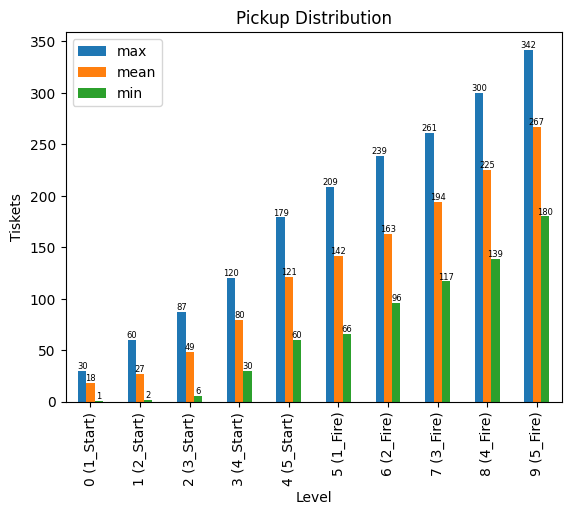

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import pickup_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    with ProcessPoolExecutor() as executor:
        for r in [executor.submit(pickup_hero.pickup) for _ in range(10000)]:
            results = np.append(results, r.result(), 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='Pickup Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()

        level    count      mean        std    min    25%    50%    75%    max
0  0 (0_Fire)  10000.0   23.8662  15.126136    1.0   10.0   23.0   36.0   50.0
1  1 (1_Fire)  10000.0   56.2065  17.827003    6.0   44.0   56.0   68.0  100.0
2  2 (2_Fire)  10000.0   89.1382  21.650173   13.0   75.0   90.0  104.0  155.0
3  3 (3_Fire)  10000.0  138.5872  26.689422   39.0  121.0  139.0  157.0  229.0
4  4 (4_Fire)  10000.0  188.0738  30.544873   62.0  167.0  188.0  209.0  299.0
5  5 (5_Fire)  10000.0  254.0036  35.645042  109.0  230.0  255.0  279.0  376.0


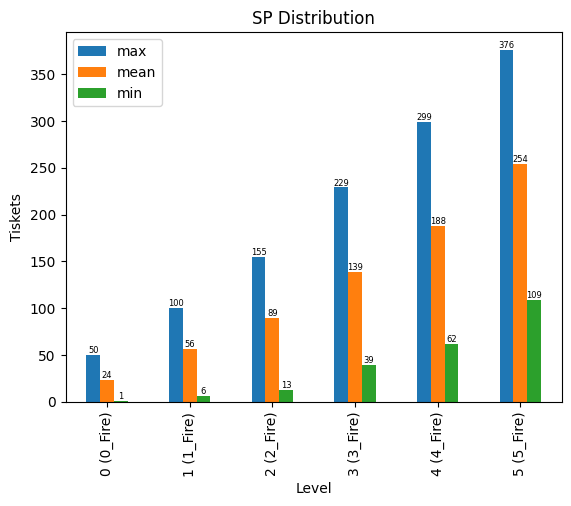

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import sp_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    with ProcessPoolExecutor() as executor:
        for r in [executor.submit(sp_hero.sp) for _ in range(10000)]:
            results = np.append(results, r.result(), 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='SP Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()

        level  count   mean        std   min    25%   50%    75%    max
0  1 (1_Fire)  100.0   1.00   0.000000   1.0   1.00   1.0   1.00    1.0
1  2 (2_Fire)  100.0  25.28  14.079916   3.0  12.00  26.0  36.00   50.0
2  3 (3_Fire)  100.0  75.31  19.704225  34.0  61.75  74.0  88.25  129.0


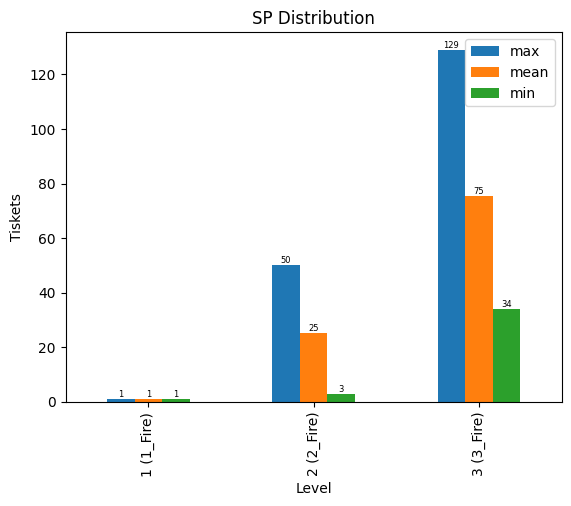

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import sp_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    args = [[1, 75, 3]] * 100
    with ProcessPoolExecutor() as executor:
        for r in executor.map(sp_hero.sp_specific_wrapper, args):
            results = np.append(results, r, 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='SP Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()